# Data Virtualization

In this part we conduct EDA

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
data=pd.read_csv('../dataset/processed/cleanedData.csv')
data.head(2)

,Movie_Title,Movie_ID,Budget,Cast,Crew,Studios,Genre,Keywords,Languages,Countries,Filming_Location,Release_Data,Runtime,Gross_worldwide,Rating,Rating_Count,ListOfCertificate,Release_Year,Release_Month,Release_Day
0,Star Wars: Episode VII - The Force Awakens,2488496,245000000,"['Daisy Ridley', 'John Boyega', 'Oscar Isaac',...","Lawrence Kasdan,Michael Arndt,J.J. Abrams","['Lucasfilm', 'Bad Robot', 'Truenorth Producti...","['Action', 'Adventure', 'Sci-Fi']","['reboot', 'sanitation employee', 'remake', 'c...",['English'],['United States'],"Skellig Michael, County Kerry, Ireland",2015-12-18,138,2069521700,7.8,893000,['PG-13'],2015,12,18
1,Frozen II,4520988,150000000,"['Kristen Bell', 'Idina Menzel', 'Josh Gad', '...","Jennifer Lee,Hans Christian Andersen,Chris Buck","['Walt Disney Animation Studios', 'Walt Disney...","['Animation', 'Adventure', 'Comedy', 'Family',...","['autumn', 'anthropomorphic snowman', 'princes...",['English'],['United States'],"Norway, Norge",2019-11-22,103,1450026933,6.8,156000,['PG'],2019,11,22


Load list fields

In [16]:
import ast
cols =['Cast', 'Genre', 'Studios', 'ListOfCertificate','Keywords', 'Languages', 'Countries']
for col in cols:
    data[col]=data[col].apply(ast.literal_eval)

## Process multivalued fields with Money and Count
1. Input
- Dataframe: Dataframe need to be process
- Name: Name of the columns we want to process. In this project they are **Cast**, **Genre** or **Studios**

2. Output
- Output: DataFrame contains information related to the columns combined with Money and Count

In [63]:
def parseWithMoneyAndCount(dataframe, colName):
    result = []
    count = []
    gross = []
    for i,record in enumerate(dataframe[colName]):
      for x in record:
        #Lưu kết quả vào mảng tương ứng
          result.append(x)
          gross.append(dataframe['Gross_worldwide'][i])
          count.append(1)
    #Tạo dataFrame
    t = pd.DataFrame({colName:result, 'Money':gross, 'Count':count})
    #Loại bỏ các giá trị trùng nhau và cộng các hàng tương ứng lại 
    result = t.groupby(colName).sum()
    #Sắp xếp lại dataFrame
    sort_by_money = result.sort_values('Money', ascending = False)
    return sort_by_money

## Brief information about data



In [18]:
data.describe()

,Movie_ID,Budget,Runtime,Gross_worldwide,Rating,Rating_Count,Release_Year,Release_Month,Release_Day
count,5.460000e+03,5.460000e+03,5460.000000,5.460000e+03,5460.000000,5.460000e+03,5460.000000,5460.000000,5460.000000
mean,9.094965e+05,3.482923e+07,109.204029,9.971488e+07,6.410275,1.148867e+05,2000.550733,6.756410,15.995055
std,1.443401e+06,4.161043e+07,18.565365,1.851966e+08,0.990306,1.877999e+05,13.030724,3.436814,8.600482
min,1.234900e+04,1.000000e+04,61.000000,2.100000e+02,1.400000,1.210000e+02,1921.000000,1.000000,1.000000
25%,1.057922e+05,9.500000e+06,96.000000,1.070074e+07,5.800000,1.600000e+04,1993.000000,4.000000,9.000000
50%,2.746850e+05,2.000000e+07,106.000000,3.453816e+07,6.500000,5.000000e+04,2002.000000,7.000000,16.000000
75%,1.172095e+06,4.200000e+07,119.000000,1.040415e+08,7.100000,1.290000e+05,2011.000000,10.000000,23.000000
max,9.844522e+06,3.560000e+08,271.000000,2.847246e+09,9.200000,2.500000e+06,2021.000000,12.000000,31.000000


## Heatmap of Correlation Matrix, Histogram and Scatter Matrix



array([[<AxesSubplot:xlabel='Budget', ylabel='Budget'>,
        <AxesSubplot:xlabel='Runtime', ylabel='Budget'>,
        <AxesSubplot:xlabel='Release_Year', ylabel='Budget'>,
        <AxesSubplot:xlabel='Gross_worldwide', ylabel='Budget'>,
        <AxesSubplot:xlabel='Rating', ylabel='Budget'>,
        <AxesSubplot:xlabel='Rating_Count', ylabel='Budget'>,
        <AxesSubplot:xlabel='Release_Month', ylabel='Budget'>],
       [<AxesSubplot:xlabel='Budget', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Runtime', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Release_Year', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Gross_worldwide', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Rating', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Rating_Count', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Release_Month', ylabel='Runtime'>],
       [<AxesSubplot:xlabel='Budget', ylabel='Release_Year'>,
        <AxesSubplot:xlabel='Runtime', ylabel='Release_Year'>,
        <AxesSubplot:xla

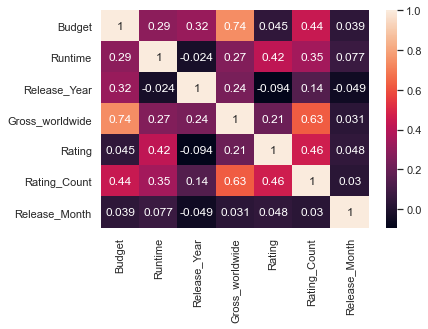

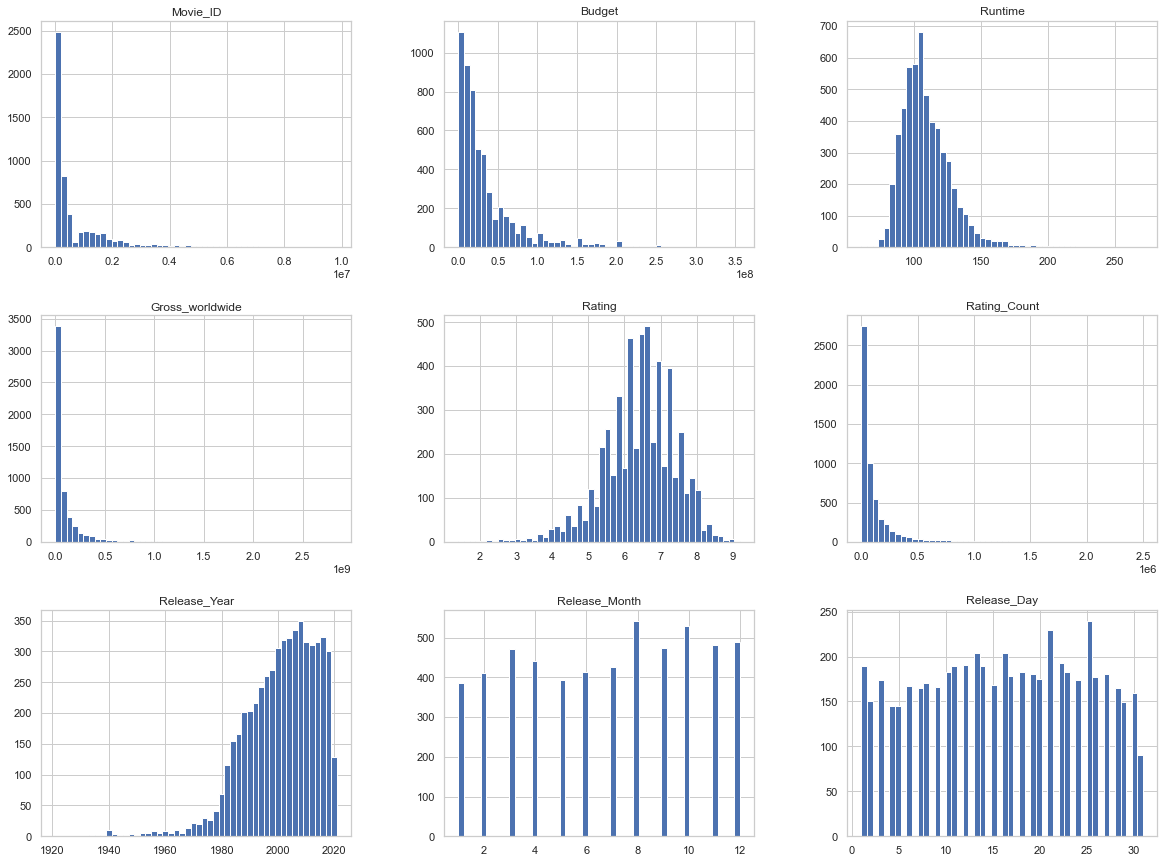

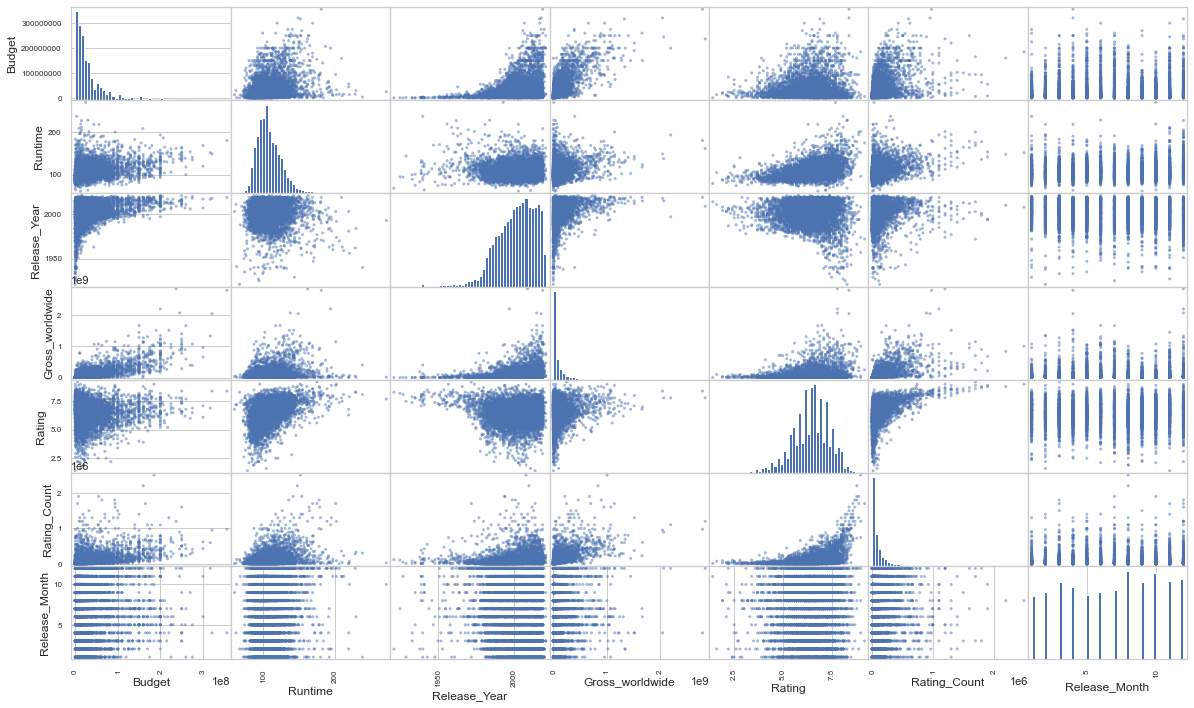

In [20]:
from pandas.plotting import scatter_matrix
cols=['Budget','Runtime','Release_Year','Gross_worldwide','Rating','Rating_Count','Release_Month']
info=data[cols]
sns.heatmap(info.corr(),annot=True)

data.hist(bins=50,figsize=(20,15))

scatter_matrix(info,figsize=(20,12),hist_kwds={'bins':50})

## Question 1
Average worldwide gross on each Genre

<AxesSubplot:xlabel='Genre'>

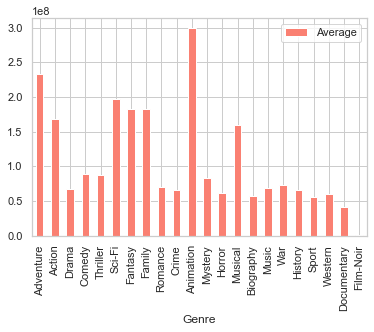

In [64]:
genre = parseWithMoneyAndCount(data,'Genre')
genre.reset_index(inplace=True)
genre=genre.assign(Average=genre['Money']/genre['Count'])
genre.plot.bar(x='Genre',y='Average',color="salmon")

We can see from the bar diagram that the following Genres have the highest average gross

**Adventure, Action, Sci-fi, Fantasy, Family, Animation, Musical**

## Question 2

How average gross depend on Release_Month and combine with Release_Year.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


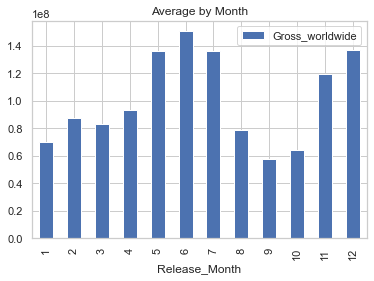

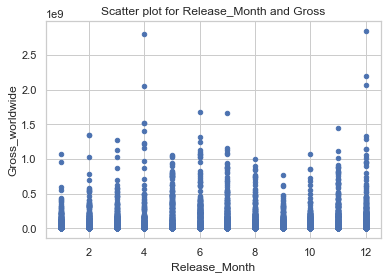

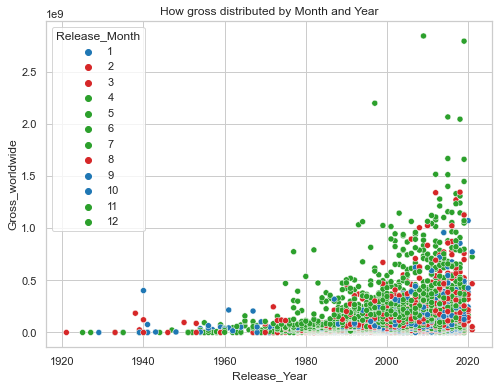

In [65]:
cols=['Release_Month','Gross_worldwide']

month=data[cols]
month=month.groupby("Release_Month").mean().reset_index()
#1
month.plot.bar(x='Release_Month',y='Gross_worldwide')
plt.title("Average by Month")
#2
data.plot.scatter(x='Release_Month',y='Gross_worldwide')
plt.title("Scatter plot for Release_Month and Gross")
#3
rColor=[2,3,8] 
gColor=[4,5,6,7,11,12]
bColor=[1,9,10]
colorMap=dict()
for i in rColor:
    colorMap[i]='tab:red'
for i in gColor:
    colorMap[i]='tab:green'
for i in bColor:
    colorMap[i]='tab:blue'
C=colorMap
fig = plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Release_Year',y='Gross_worldwide',hue='Release_Month',palette=C)
plt.title("How gross distributed by Month and Year")
plt.show()

We see that the movies release in the month [4,5,6,7,11,12] tends to have higher gross.

And also gross increases by year.

## Question 4

Relation between Budget and Gross_worldwide

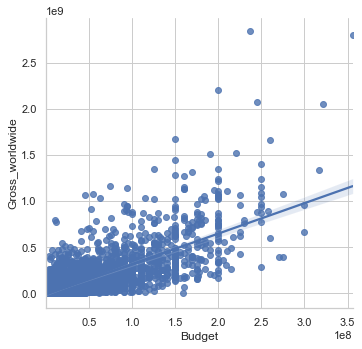

In [21]:
sns.lmplot(data=data,x='Budget',y='Gross_worldwide')

Budget and Gross_worldwide may have linear relation

## Question 5

Cast and average gross of the movies they cast for

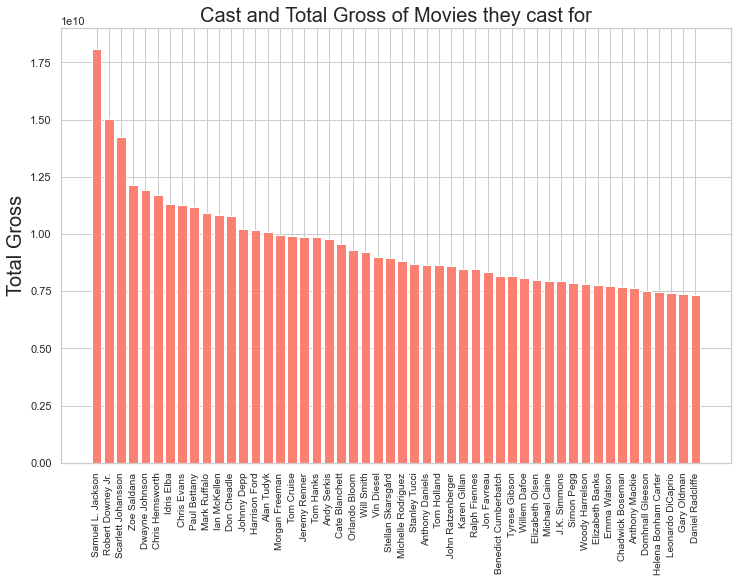

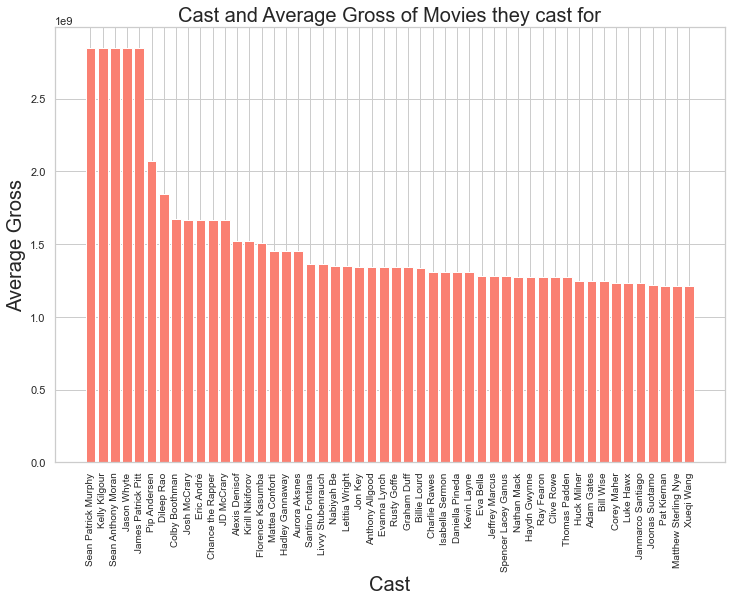

In [66]:
cast = parseWithMoneyAndCount(data,'Cast')
cast.reset_index(inplace=True)
cast=cast.assign(Average=cast['Money']/cast['Count'])
fig=plt.figure(figsize=(12,8))
# plt.subplot(2,1,1)
data2=cast.sort_values(by='Money',ascending=False)[0:50]
plt.bar(data=data2,x='Cast',height='Money',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.ylabel("Total Gross",fontsize=20)
plt.title("Cast and Total Gross of Movies they cast for",fontsize=20)
fig=plt.figure(figsize=(12,8))
# plt.subplot(2,1,2)
data3=cast.sort_values(by='Average',ascending=False)[0:50]
plt.bar(data=data3,x='Cast',height='Average',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.title("Cast and Average Gross of Movies they cast for",fontsize=20)
plt.xlabel("Cast",fontsize=20)
plt.ylabel("Average Gross",fontsize=20)
plt.show()

We may construct a Cast Rank.

## Question 6

Studio and total gross of the movies they work for
* Have not devide gross to each Studio if they coop together

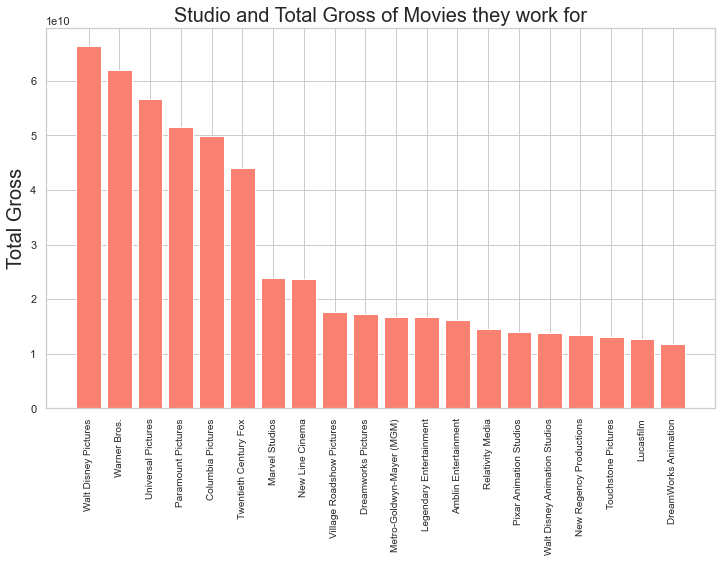

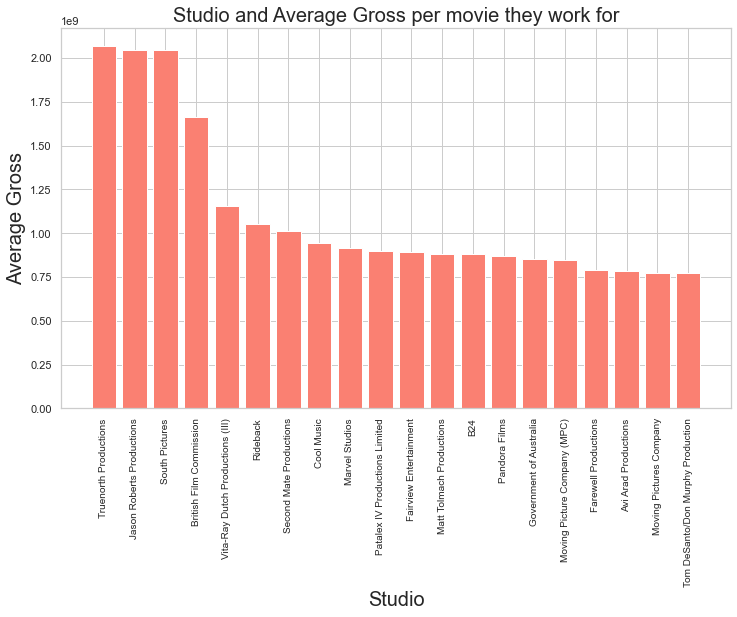

In [67]:
studio = parseWithMoneyAndCount(data,'Studios')
studio.reset_index(inplace=True)
studio=studio.assign(Average=studio['Money']/studio['Count'])
fig=plt.figure(figsize=(12,7))
# plt.subplot(2,1,1)
data2=studio.sort_values(by='Money',ascending=False)[0:20]
plt.bar(data=data2,x='Studios',height='Money',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.ylabel("Total Gross",fontsize=20)
plt.title("Studio and Total Gross of Movies they work for",fontsize=20)
plt.show()
# plt.subplot(2,1,2)
fig=plt.figure(figsize=(12,7))
data3=studio.sort_values(by='Average',ascending=False)[0:20]
plt.bar(data=data3,x='Studios',height='Average',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.title("Studio and Average Gross per movie they work for",fontsize=20)
plt.xlabel("Studio",fontsize=20)
plt.ylabel("Average Gross",fontsize=20)
plt.show()

We may conduct Studio Rank.

## Question 7

Average gross of each countries and Total Gross
* Have not devide gross to each Country if they coop together

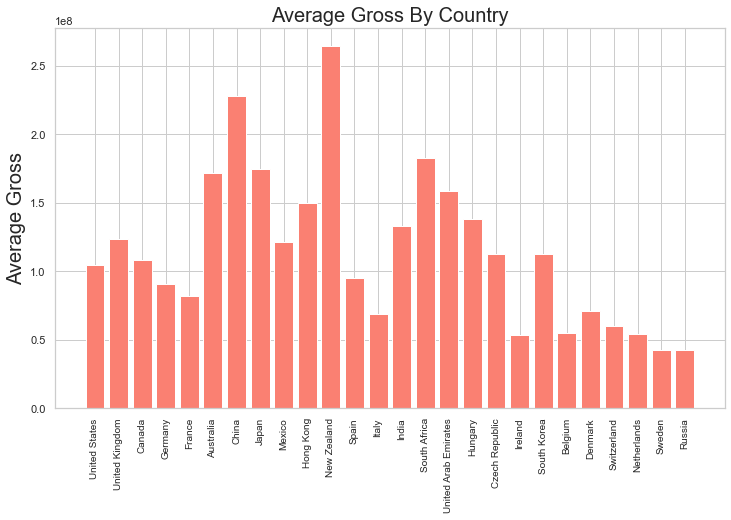

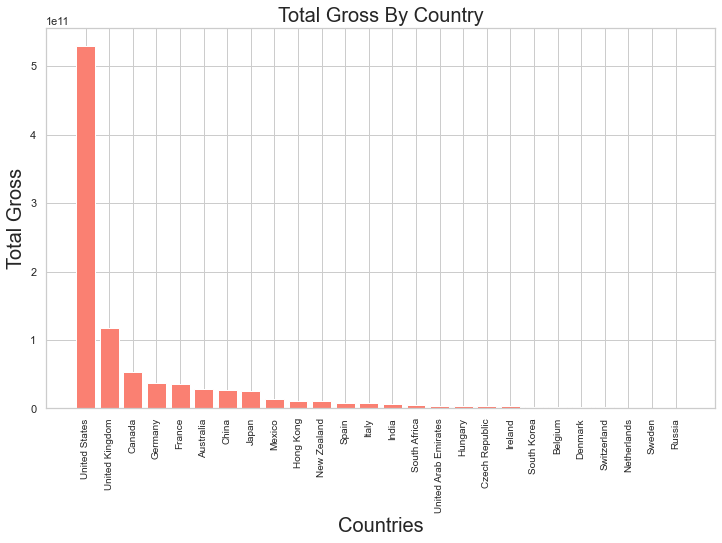

In [50]:
country = parseWithMoneyAndCount(data,'Countries')
country=country[country['Count']>20]
country.reset_index(inplace=True)
country=country.assign(Average=country['Money']/country['Count'])
fig=plt.figure(figsize=(12,7))
# plt.subplot(2,1,1)
data2=country.sort_values(by='Money',ascending=False)
plt.bar(data=data2,x='Countries',height='Average',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.ylabel("Average Gross",fontsize=20)
plt.title("Average Gross By Country",fontsize=20)
fig=plt.figure(figsize=(12,7))
# plt.subplot(2,1,2)
plt.bar(data=data2,x='Countries',height='Money',color="salmon")
plt.ylabel("Total Gross",fontsize=20)
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Countries",fontsize=20)
plt.title("Total Gross By Country",fontsize=20)
plt.show()
## This use for QUESTION 8
list_country=list(country['Countries'])

## Question 8

How distribution of gross by Countries

Function use for QUESTION 8 and QUESTION 9
* Have divided gross, budget on each part of record

In [70]:
def splitMultivaluedField(dataframe, colName):
    result = []
    budget=[]
    gross = []
    for i,record in enumerate(dataframe[colName]):
      for x in record:
        #Lưu kết quả vào mảng tương ứng
          result.append(x)
          budget.append(dataframe['Budget'][i]/len(record)) # Divide here
          gross.append(dataframe['Gross_worldwide'][i]/len(record)) # Divide here
    #Tạo dataFrame
    t = pd.DataFrame({colName:result,'Budget':budget, 'Money':gross})
    #Sắp xếp lại dataFrame
    sort_by_money = t.sort_values('Money', ascending = False)
    return sort_by_money

<Figure size 1152x648 with 0 Axes>

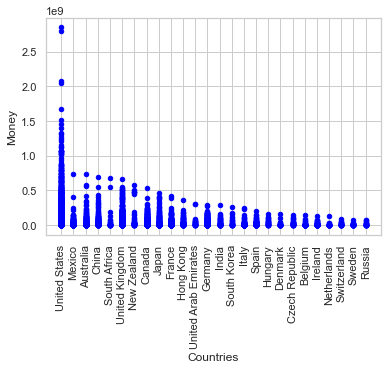

In [71]:
country=splitMultivaluedField(data,'Countries')
country=country[country['Countries'].isin(list_country)]
plt.figure(figsize=(16,9))
#sns.scatterplot(data=country,x='Budget',y='Money',hue='Countries')
country.plot.scatter(x='Countries',y='Money',color='blue')
plt.xticks(rotation=90)
plt.show()

We may conduct Country Rank Here

## Question 9

How distribution of gross by Languages

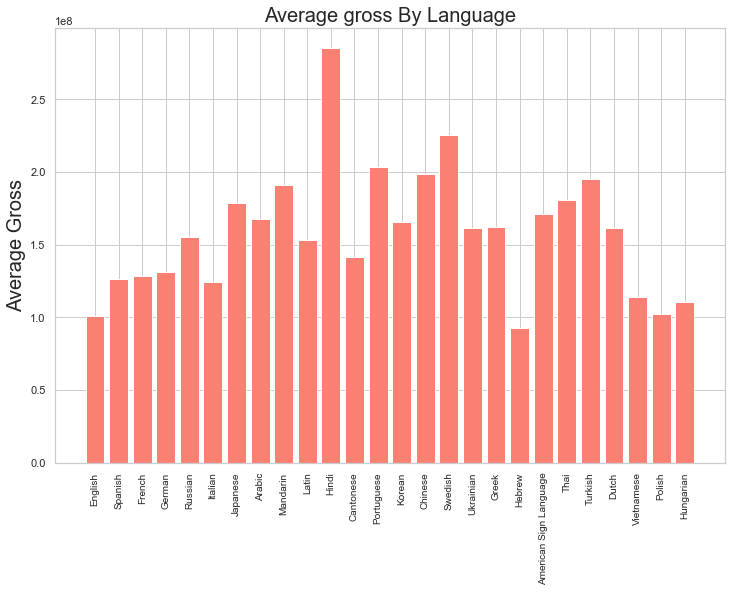

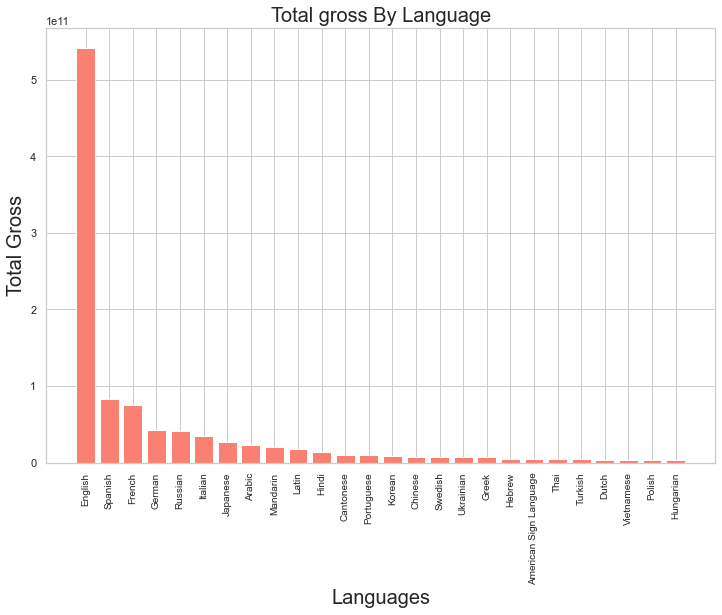

<Figure size 864x576 with 0 Axes>

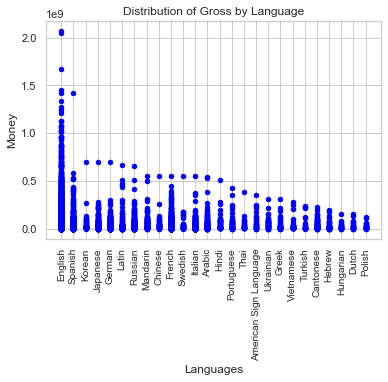

In [72]:
language=parseWithMoneyAndCount(data,'Languages')
language=language[language['Count']>20]
language.reset_index(inplace=True)
language=language.assign(Average=language['Money']/language['Count'])

fig=plt.figure(figsize=(12,8))
# plt.subplot(2,1,1)
data2=language.sort_values(by='Money',ascending=False)
plt.bar(data=data2,x='Languages',height='Average',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.ylabel("Average Gross",fontsize=20)
plt.title("Average gross By Language",fontsize=20)
plt.show()

# plt.subplot(2,1,2)
fig=plt.figure(figsize=(12,8))
plt.bar(data=data2,x='Languages',height='Money',color="salmon")
plt.ylabel("Total Gross",fontsize=20)
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Languages",fontsize=20)
plt.title("Total gross By Language",fontsize=20)
plt.show()
#Top languages
listLanguage=list(data2['Languages'])

language=splitMultivaluedField(data,'Languages')
language=language[language['Languages'].isin(listLanguage)]
plt.figure(figsize=(12,8))
#sns.scatterplot(data=country,x='Budget',y='Money',hue='Countries')
language.plot.scatter(x='Languages',y='Money',color='blue')
plt.xticks(rotation=90,fontsize=10)
plt.title("Distribution of Gross by Language")
plt.show()

## Question 10

How distribution of gross by Keywords
* Since we will not divide gross to each keyword 
* So we redefine the function splitMultivaluedField

In [73]:
def splitMultivaluedField(dataframe, colName):
    result = []
    gross = []
    budget=[]
    for i,record in enumerate(dataframe[colName]):
      for x in record:
        #Lưu kết quả vào mảng tương ứng
          result.append(x)
          budget.append(dataframe['Budget'][i])
          gross.append(dataframe['Gross_worldwide'][i])
    #Tạo dataFrame
    t = pd.DataFrame({colName:result,'Budget':budget, 'Money':gross})
    #Sắp xếp lại dataFrame
    sort_by_money = t.sort_values('Money', ascending = False)
    return sort_by_money

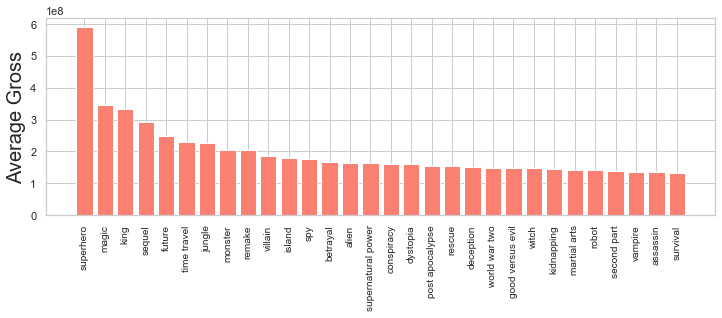

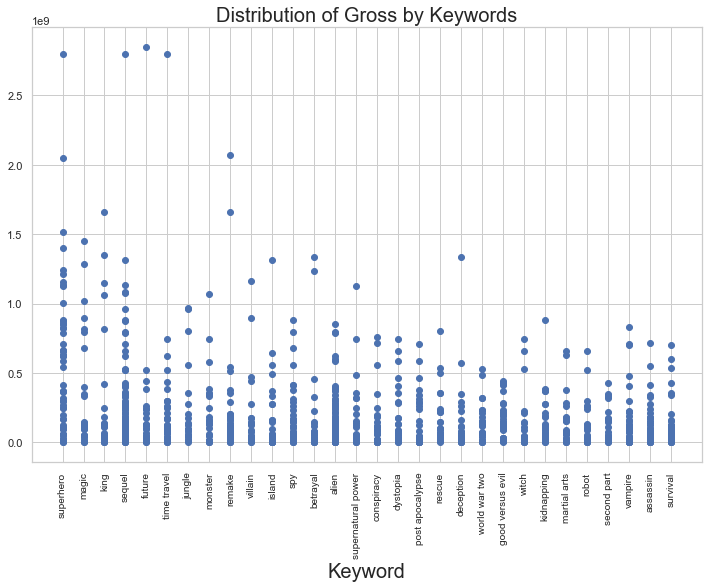

In [77]:
keyword=parseWithMoneyAndCount(data,'Keywords')
keyword=keyword[keyword['Count']>20]
keyword.reset_index(inplace=True)
keyword=keyword.assign(Average=keyword['Money']/keyword['Count'])
fig=plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
data2=keyword.sort_values(by='Average',ascending=False)[0:30]
plt.bar(data=data2,x='Keywords',height='Average',color="salmon")
plt.xticks(rotation=90,fontsize=10)
plt.ylabel("Average Gross",fontsize=20)

listKeywords=list(data2['Keywords'])

keyword=splitMultivaluedField(data,'Keywords')
keyword=keyword[keyword['Keywords'].isin(listKeywords)]

fig, ax = plt.subplots(figsize=(12,8)) 
max=np.max(keyword['Money'])
sentinel, = ax.plot(listKeywords, np.linspace(0, max, len(listKeywords)))
sentinel.remove()

ax=plt.scatter(data=keyword,x='Keywords',y='Money')
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Keyword",fontsize=20)
plt.title("Distribution of Gross by Keywords",fontsize=20)
plt.show()

We may conduct keyword rank